In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle

In [2]:
# stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [5]:
sentences = []
labels = []
with open("/IPD - Reddit Dataset - consolidated.csv", 'r') as csvfile:
    dataset = csv.reader(csvfile)
    next(dataset, None)
    for item in dataset:
      labels.append(int(item[1]))
      sentence = item[0]
      for word in stopwords:
        token = " " + word + " "
        sentence = sentence.replace(token, " ")
        sentence = sentence.replace("  ", " ")
      sentences.append(sentence)

print(sentences)
print(labels)
print(len(labels))
print(len(labels))

['I love him', 'I got accepted Graduate program I wanted. But journey, took place 7 years -&gt;\n\nI spent several years city college Florida\n\n\\-&gt;\n\nI dropped several times.\n\n\\-&gt;\n\nsurvived suicide attempt.\n\n\\- &gt;\n\nYears later I ended healing, took Learning disability test College Center turns I scored higher top 1% verbal score wise, simultaneously learning disability mathematics news me, I thought I stupid test.\n\n\\-&gt;\n\nGot math waiver help Math requirement.\n\n\\-&gt;\n\nThan I awoke spark enrolled 4 year local university completing retaking dropped classes 15-20 units\n\n\\-&gt;\n\nfinished Undergrad degree two minors 1st Philosophy 2nd Ethics Honors Phil Ethics minors.\n\n\\-&gt;\n\nI Prayed.\n\n\\-&gt;\n\nI just got accepted Grad Program Choice accredited divinity school, Graduate Program.\n\nI feeling fucking stoked, long ass journey though.', 'our film production professor gave us midterms back today. test b r u t l. got 100!!!!! shocked couldnâ€™t co

In [6]:
sentences, labels = shuffle(sentences, labels, random_state=3)

In [7]:
# hyperparameters

vocab_size = 3000
embedding_dim = 8
max_length = 200
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 3500
num_epochs = 50
batch_size = 15
learning_rate = 3e-4

In [8]:
# metrics

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
adam = tf.keras.optimizers.Adam(learning_rate)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy', precision, recall])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 8)            24000     
                                                                 
 bidirectional (Bidirectiona  (None, 512)              542720    
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 632,513
Trainable params: 632,513
Non-trainable params: 0
_________________________________________________________________


In [10]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/50
110/110 [==============================] - 35s 214ms/step - loss: 0.4857 - accuracy: 0.8314 - precision: 0.8345 - recall: 0.9952 - val_loss: 0.4612 - val_accuracy: 0.8223 - val_precision: 0.8223 - val_recall: 1.0000
Epoch 2/50
110/110 [==============================] - 18s 165ms/step - loss: 0.4153 - accuracy: 0.8349 - precision: 0.8347 - recall: 1.0000 - val_loss: 0.4006 - val_accuracy: 0.8473 - val_precision: 0.8528 - val_recall: 0.9843
Epoch 3/50
110/110 [==============================] - 14s 126ms/step - loss: 0.2798 - accuracy: 0.8823 - precision: 0.8936 - recall: 0.9750 - val_loss: 0.2695 - val_accuracy: 0.8829 - val_precision: 0.9267 - val_recall: 0.9312
Epoch 4/50
110/110 [==============================] - 12s 113ms/step - loss: 0.1984 - accuracy: 0.9266 - precision: 0.9428 - recall: 0.9709 - val_loss: 0.2394 - val_accuracy: 0.9087 - val_precision: 0.9322 - val_recall: 0.9587
Epoch 5/50
110/110 [==============================] - 9s 77ms/step - loss: 0.1442 - accuracy

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

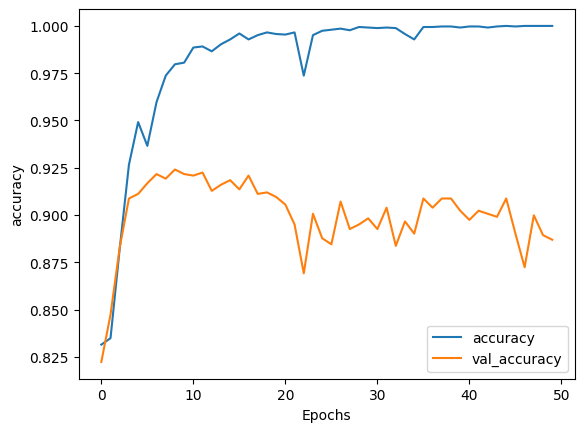

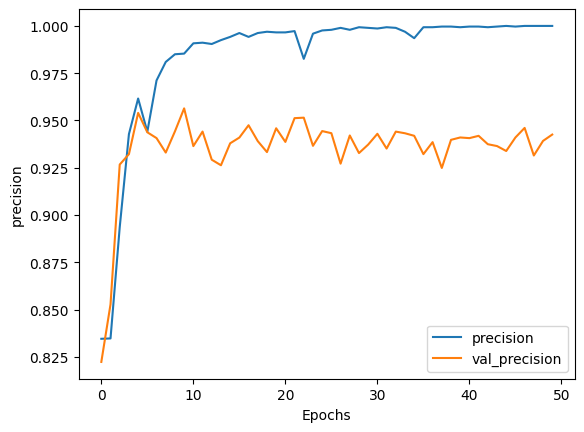

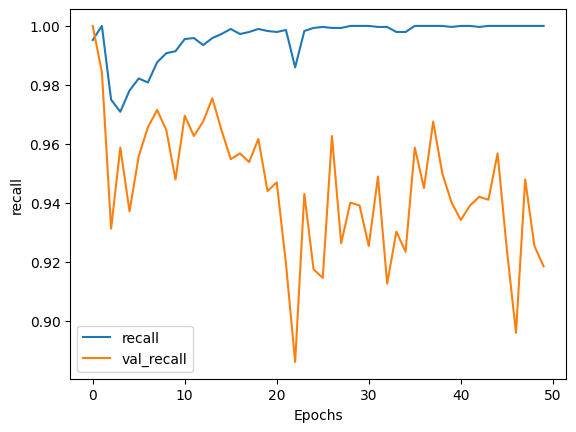

In [12]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'precision')
plot_graphs(history, 'recall')

In [46]:
a=tokenizer.texts_to_sequences(['i am feeling happy today',"i am sad", "my dog ate my homework and then i fell into a ditch, broke my ribs"])
a= np.array(a)

model.predict(pad_sequences(a, maxlen=max_length, padding=padding_type, truncating=trunc_type))

# testing_sequences


1/1 [==============================] - 0s 22ms/step


<ipython-input-46-2d94b6dc1ba7>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a= np.array(a)


array([[0.00137828],
       [0.99999964],
       [0.9892783 ]], dtype=float32)